In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# **Limpieza de Datos**

In [ ]:
# Cargar el archivo original y crear la copia
df_original = pd.read_excel('data.xlsx')
df2 = df_original.copy()  # Copia para limpieza

In [ ]:
# Información general de las columnas y tipos de datos
print(df2.info())

# Primeras filas del dataset
print(df2.head())

# Verificar valores faltantes
print(df2.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16351 entries, 0 to 16350
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                16351 non-null  int64 
 1   Category          16351 non-null  object
 2   Manufacturer      16351 non-null  object
 3   Model             16351 non-null  object
 4   Prod. year        16351 non-null  int64 
 5   Gear box type     16351 non-null  object
 6   Leather interior  16351 non-null  object
 7   Fuel type         16351 non-null  object
 8   Engine volume     16351 non-null  object
 9   Drive wheels      16351 non-null  object
 10  Cylinders         16351 non-null  int64 
 11  Mileage           16351 non-null  object
 12  Doors             16351 non-null  object
 13  Airbags           16351 non-null  int64 
 14  Wheel             16351 non-null  object
 15  Color             16351 non-null  object
 16  Sales Fee         16351 non-null  object
 17  price       

In [ ]:
# Convertir todos los valores a texto para poder usar .str.replace
df2['Mileage'] = df2['Mileage'].astype(str).str.replace(' km', '').astype(int)

# Eliminar "Turbo" y convertir `Engine volume` a flotante
df2['Engine volume'] = df2['Engine volume'].astype(str).str.replace(' Turbo', '').astype(float)

# Reemplazar "-" por la mediana en `Doors` si aplica
df2['Doors'] = pd.to_numeric(df2['Doors'], errors='coerce')  # Convertir "-" a NaN
df2['Doors'].fillna(df2['Doors'].median(), inplace=True)  # Llenar con la mediana
df2['Doors'] = df2['Doors'].astype(int)

# Convertir "-" en `Sales Fee` a NaN y rellenar con la mediana
df2['Sales Fee'] = pd.to_numeric(df2['Sales Fee'], errors='coerce')
df2['Sales Fee'].fillna(df2['Sales Fee'].median(), inplace=True)

# Confirmar tipos de datos
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16351 entries, 0 to 16350
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                16351 non-null  int64  
 1   Category          16351 non-null  object 
 2   Manufacturer      16351 non-null  object 
 3   Model             16351 non-null  object 
 4   Prod. year        16351 non-null  int64  
 5   Gear box type     16351 non-null  object 
 6   Leather interior  16351 non-null  object 
 7   Fuel type         16351 non-null  object 
 8   Engine volume     16351 non-null  float64
 9   Drive wheels      16351 non-null  object 
 10  Cylinders         16351 non-null  int64  
 11  Mileage           16351 non-null  int64  
 12  Doors             16351 non-null  int64  
 13  Airbags           16351 non-null  int64  
 14  Wheel             16351 non-null  object 
 15  Color             16351 non-null  object 
 16  Sales Fee         16351 non-null  float6

<ipython-input-8-89772219ff93>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Doors'].fillna(df2['Doors'].median(), inplace=True)  # Llenar con la mediana
<ipython-input-8-89772219ff93>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [ ]:
# Reemplazar "-" por la mediana en `Doors` si aplica
df2['Doors'] = pd.to_numeric(df2['Doors'], errors='coerce')  # Convertir "-" a NaN
df2['Doors'] = df2['Doors'].fillna(df2['Doors'].median()).astype(int)  # Llenar con la mediana y convertir a int

# Convertir "-" en `Sales Fee` a NaN y rellenar con la mediana
df2['Sales Fee'] = pd.to_numeric(df2['Sales Fee'], errors='coerce')
df2['Sales Fee'] = df2['Sales Fee'].fillna(df2['Sales Fee'].median())


                 Id    Prod. year  Engine volume     Cylinders       Mileage  \
count  16351.000000  16351.000000   16351.000000  16351.000000  1.635100e+04   
mean    9651.053452   2010.928689       2.308470      4.582839  1.386569e+06   
std     5548.292283      5.656275       0.870142      1.198713  4.550536e+07   
min        0.000000   1939.000000       0.000000      1.000000  0.000000e+00   
25%     4860.500000   2009.000000       1.800000      4.000000  7.000000e+04   
50%     9654.000000   2012.000000       2.000000      4.000000  1.257450e+05   
75%    14444.500000   2015.000000       2.500000      4.000000  1.880780e+05   
max    19236.000000   2020.000000      20.000000     16.000000  2.147484e+09   

              Doors       Airbags     Sales Fee         price  
count  16351.000000  16351.000000  16351.000000  1.635100e+04  
mean       3.920983      6.578619    870.679775  1.887721e+04  
std        0.389614      4.313174    393.720824  2.065707e+05  
min        2.000000    

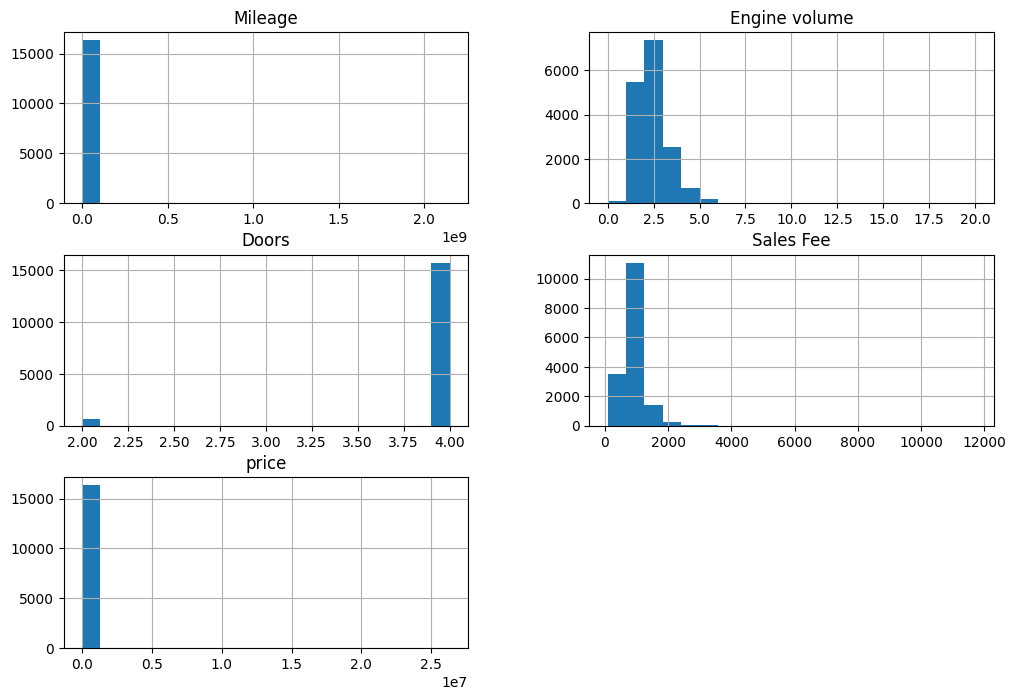

Category unique values:
['Jeep' 'Sedan' 'Universal' 'Hatchback' 'Microbus' 'Minivan' 'Coupe'
 'Cabriolet' 'Pickup' 'Goods wagon' 'Limousine']

Manufacturer unique values:
['HYUNDAI' 'MITSUBISHI' 'MERCEDES-BENZ' 'HONDA' 'FORD' 'TOYOTA' 'LEXUS'
 'VOLKSWAGEN' 'FIAT' 'BMW' 'MAZDA' 'CHEVROLET' 'NISSAN' 'SUBARU'
 'SSANGYONG' 'SUZUKI' 'VOLVO' 'AUDI' 'ROLLS-ROYCE' 'VAZ' 'PORSCHE' 'KIA'
 'JEEP' 'DODGE' 'OPEL' 'INFINITI' 'JAGUAR' 'GMC' 'RENAULT' 'DAEWOO'
 'LAND ROVER' 'SKODA' 'MINI' 'SEAT' 'DAIHATSU' 'GAZ' 'HUMMER' 'ALFA ROMEO'
 'CHRYSLER' 'BUICK' 'PEUGEOT' 'UAZ' 'CADILLAC' 'MASERATI' 'LINCOLN'
 'CITROEN' 'ZAZ' 'MERCURY' 'SCION' 'ACURA' 'ASTON MARTIN' 'LANCIA' 'ROVER'
 'PONTIAC' 'ISUZU' 'MOSKVICH' '·É°·ÉÆ·Éï·Éê' 'LAMBORGHINI' 'BENTLEY'
 'TESLA' 'SAAB' 'HAVAL' 'FERRARI' 'SATURN' 'GREATWALL']

Gear box type unique values:
['Automatic' 'Manual' 'Tiptronic' 'Variator']

Leather interior unique values:
['Yes' 'No']

Fuel type unique values:
['Diesel' 'Petrol' 'CNG' 'Hybrid' 'LPG' 'Plug-in Hybrid' 'Hy

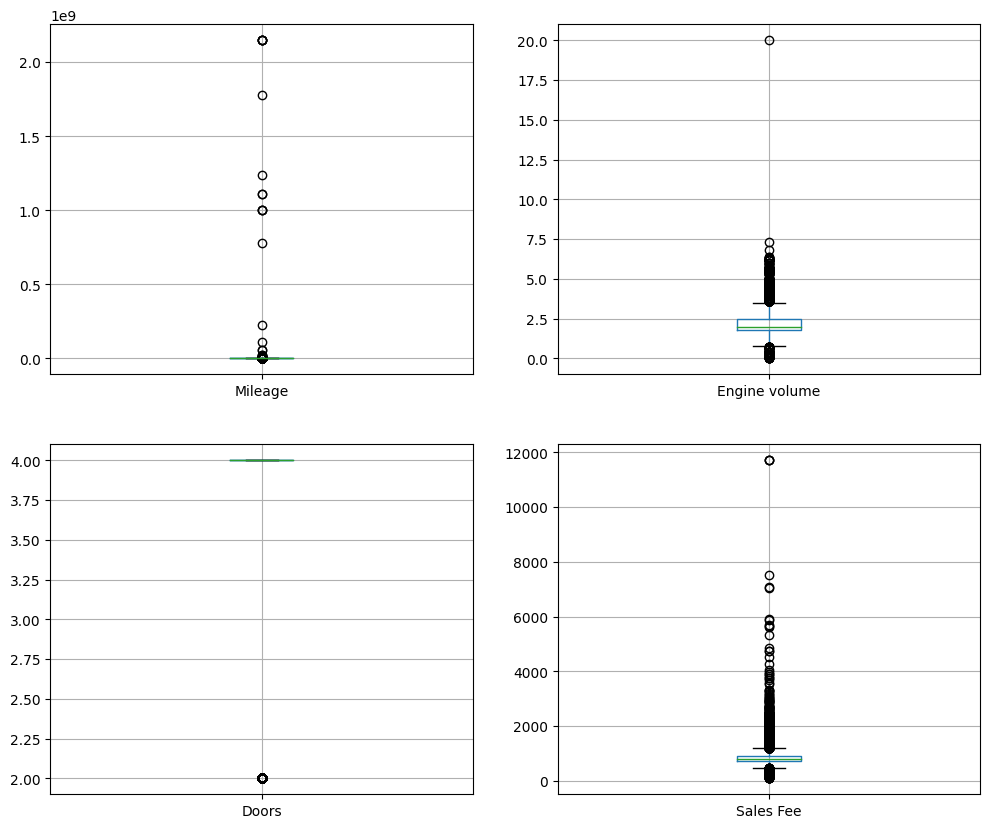

In [ ]:
# Estadísticas descriptivas para todas las columnas numéricas
print(df2.describe())
df2[['Mileage', 'Engine volume', 'Doors', 'Sales Fee', 'price']].hist(bins=20, figsize=(12, 8))
plt.show()
# Verificar valores únicos en columnas categóricas
for column in ['Category', 'Manufacturer', 'Gear box type', 'Leather interior', 'Fuel type', 'Drive wheels', 'Wheel', 'Color']:
    print(f"{column} unique values:\n{df2[column].unique()}\n")
# Crear boxplots para verificar outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
df2.boxplot(column='Mileage', ax=axes[0, 0])
df2.boxplot(column='Engine volume', ax=axes[0, 1])
df2.boxplot(column='Doors', ax=axes[1, 0])
df2.boxplot(column='Sales Fee', ax=axes[1, 1])
plt.show()

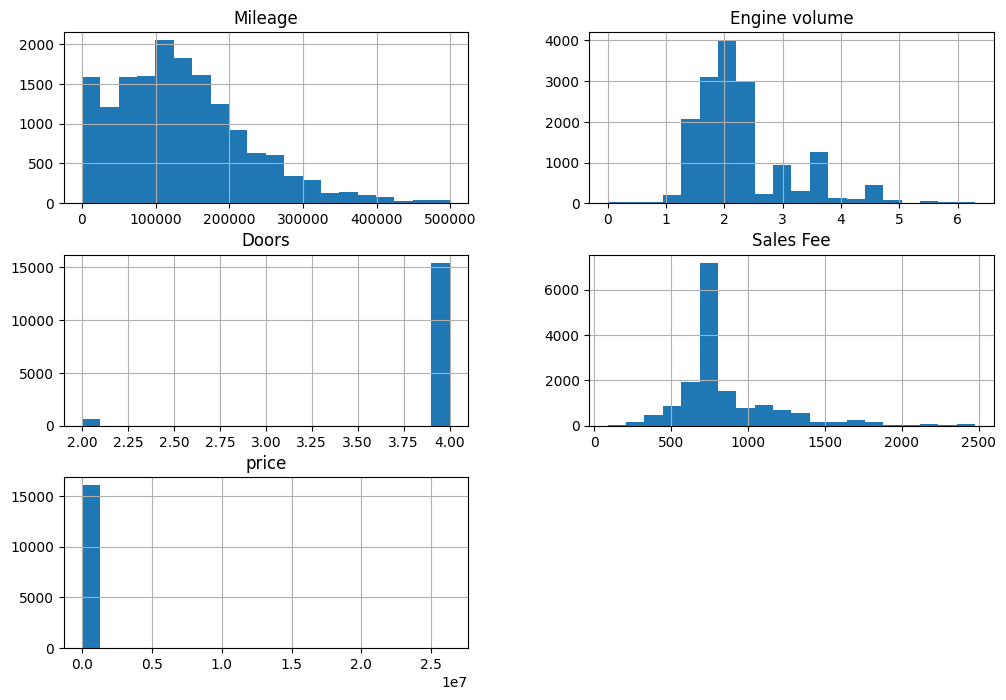

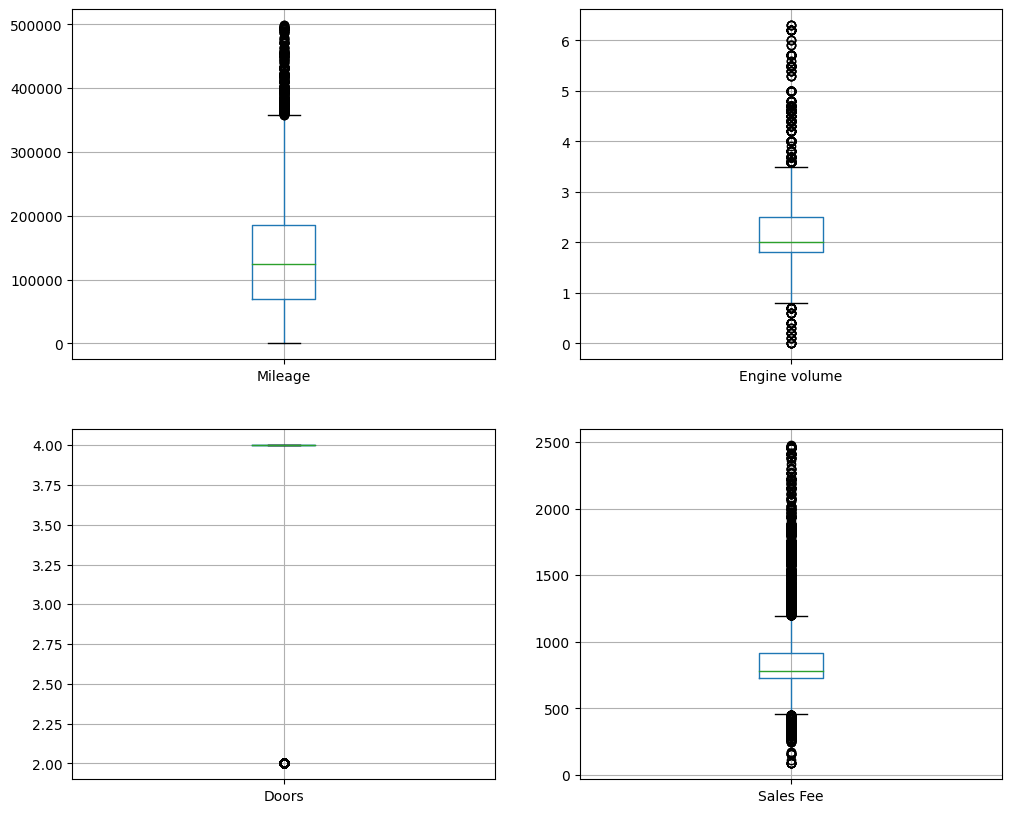

In [ ]:
# Remover valores anómalos en Mileage
df2 = df2[df2['Mileage'] < 500000]
# Remover valores anómalos en Engine volume
df2 = df2[df2['Engine volume'] <= 8.0]
# Remover outliers en Sales Fee
df2 = df2[df2['Sales Fee'] < 2500]
# Crear histogramas y boxplots nuevamente para verificar
df2[['Mileage', 'Engine volume', 'Doors', 'Sales Fee', 'price']].hist(bins=20, figsize=(12, 8))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
df2.boxplot(column='Mileage', ax=axes[0, 0])
df2.boxplot(column='Engine volume', ax=axes[0, 1])
df2.boxplot(column='Doors', ax=axes[1, 0])
df2.boxplot(column='Sales Fee', ax=axes[1, 1])
plt.show()


# **Limpieza de Datos**
Se realizó una limpieza de los datos para eliminar valores atípicos en las columnas clave:


*   Mileage: Se limitó a un máximo de 500,000 km para evitar valores excesivos.
*   Engine Volume: Se estableció un máximo de 8 litros para filtrar valores fuera de lo común.
*   Sales Fee: Se ajustó a un límite máximo de 2,500 para manejar los impuestos de manera realista.
Se generaron visualizaciones para confirmar que los datos están limpios y listos para la siguiente fase del proceso. Este paso es esencial para mejorar la precisión del modelo.

In [ ]:
# Guardar el DataFrame limpio en un archivo CSV
df2.to_csv('datos_limpios.csv', index=False)

# Descargar el archivo
from google.colab import files
files.download('datos_limpios.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**ARREGLOS DE LIMPIEZA DESDE 0**

In [ ]:

# Cargar archivos de datos
df_train = pd.read_excel('data.xlsx')
df_eval = pd.read_excel('Evaluation.xlsx')

# Crear copias de trabajo para limpiar y manipular
df_train_copy = df_train.copy()
df_eval_copy_ = df_eval.copy()


In [ ]:
# Identificar columnas cualitativas
qualitative_columns = df_train_copy.select_dtypes(include=['object']).columns

# Contar los valores únicos en cada columna cualitativa
for col in qualitative_columns:
    print(f"\nColumna: {col}")
    print(df_train_copy[col].value_counts())



Columna: Category
Category
Sedan          7410
Jeep           4702
Hatchback      2403
Minivan         548
Coupe           443
Universal       304
Microbus        258
Goods wagon     200
Pickup           43
Cabriolet        30
Limousine        10
Name: count, dtype: int64

Columna: Manufacturer
Manufacturer
HYUNDAI          3219
TOYOTA           3148
MERCEDES-BENZ    1722
FORD              919
CHEVROLET         917
                 ... 
TESLA               1
HAVAL               1
FERRARI             1
SATURN              1
GREATWALL           1
Name: count, Length: 65, dtype: int64

Columna: Model
Model
Sonata           919
Prius            916
Camry            809
Elantra          794
E 350            451
                ... 
RIO lx             1
Qashqai SPORT      1
130                1
ML 550             1
Megane 1.5CDI      1
Name: count, Length: 1446, dtype: int64

Columna: Gear box type
Gear box type
Automatic    11492
Tiptronic     2633
Manual        1584
Variator       642
Nam

In [ ]:
print(df_train_copy.head())
print(df_eval_copy.head())

      Id   Category   Manufacturer     Model  Prod. year Gear box type  \
0   2680       Jeep        HYUNDAI        H1        2014     Automatic   
1   5960      Sedan     MITSUBISHI    Mirage        2002     Automatic   
2   2185       Jeep        HYUNDAI  Santa FE        2014     Automatic   
3  15905      Sedan  MERCEDES-BENZ     E 260        1992        Manual   
4  15337  Universal          HONDA       FIT        2015     Automatic   

  Leather interior Fuel type Engine volume Drive wheels  Cylinders    Mileage  \
0              Yes    Diesel           2.5        Front          4   74210 km   
1               No    Petrol           1.8        Front          4  160000 km   
2              Yes    Diesel             2        Front          4   51106 km   
3               No       CNG           2.6         Rear          6       0 km   
4              Yes    Hybrid           1.5        Front          4   35624 km   

  Doors  Airbags       Wheel   Color Sales Fee  price  
0     4     

In [ ]:
# Revisar tipos de datos en df_train_copy para identificar columnas de tipo datetime
print(df_train_copy.dtypes)


Id                   int64
Category            object
Manufacturer        object
Model               object
Prod. year           int64
Gear box type       object
Leather interior    object
Fuel type           object
Engine volume       object
Drive wheels        object
Cylinders            int64
Mileage             object
Doors               object
Airbags              int64
Wheel               object
Color               object
Sales Fee           object
price                int64
dtype: object


In [ ]:
# Verificar los tipos de datos en el DataFrame
print(df_train_copy.dtypes)

# Identificar columnas de tipo datetime
datetime_columns = df_train_copy.select_dtypes(include=['datetime', 'timedelta']).columns
print("\nColumnas de tipo datetime:", datetime_columns)


Id                   int64
Category            object
Manufacturer        object
Model               object
Prod. year           int64
Gear box type       object
Leather interior    object
Fuel type           object
Engine volume       object
Drive wheels        object
Cylinders            int64
Mileage             object
Doors               object
Airbags              int64
Wheel               object
Color               object
Sales Fee           object
price                int64
dtype: object

Columnas de tipo datetime: Index([], dtype='object')


In [ ]:
# Verificar si hay valores no numéricos en 'price'
non_numeric_prices = df_train_copy[~df_train_copy['price'].apply(lambda x: isinstance(x, (int, float)))]
print("Valores no numéricos en 'price':")
print(non_numeric_prices)

# Verificar si hay valores no numéricos en las columnas cualitativas
for col in qualitative_columns:
    non_numeric = df_train_copy[~df_train_copy[col].apply(lambda x: isinstance(x, str))]
    if not non_numeric.empty:
        print(f"\nValores no estándar en '{col}':")
        print(non_numeric)


Valores no numéricos en 'price':
Empty DataFrame
Columns: [Id, Category, Manufacturer, Model, Prod. year, Gear box type, Leather interior, Fuel type, Engine volume, Drive wheels, Cylinders, Mileage, Doors, Airbags, Wheel, Color, Sales Fee, price]
Index: []

Valores no estándar en 'Model':
          Id   Category Manufacturer                                    Model  \
24      7711       Jeep         FIAT                                      500   
48      7698      Sedan          BMW                                      320   
54     13303      Sedan          BMW                                      530   
62     10524       Jeep         AUDI                                        7   
84      6332      Sedan          BMW                                      318   
...      ...        ...          ...                                      ...   
16202  15960       Jeep         AUDI                                        5   
16212  11629      Coupe          BMW                          

In [ ]:
# Convertir 'price' a numérico, forzando errores a NaN para detectarlos
df_train_copy['price'] = pd.to_numeric(df_train_copy['price'], errors='coerce')

# Revisar si hay valores NaN en 'price' después de la conversión
nan_prices = df_train_copy[df_train_copy['price'].isna()]
print("Valores NaN en 'price' después de la conversión:")
print(nan_prices)


Valores NaN en 'price' después de la conversión:
Empty DataFrame
Columns: [Id, Category, Manufacturer, Model, Prod. year, Gear box type, Leather interior, Fuel type, Engine volume, Drive wheels, Cylinders, Mileage, Doors, Airbags, Wheel, Color, Sales Fee, price]
Index: []


In [ ]:
# Convertir 'Sales Fee' a numérico y manejar valores no numéricos
df_train_copy['Sales Fee'] = pd.to_numeric(df_train_copy['Sales Fee'], errors='coerce')

# Limpiar la columna 'Engine volume' eliminando valores que contengan texto adicional como "Turbo"
df_train_copy['Engine volume'] = df_train_copy['Engine volume'].replace(regex=r'\s*Turbo', value='')
df_train_copy['Engine volume'] = pd.to_numeric(df_train_copy['Engine volume'], errors='coerce')

# Asegurarse de que 'Doors' tenga valores válidos, reemplazando o eliminando valores no numéricos
df_train_copy['Doors'] = pd.to_numeric(df_train_copy['Doors'], errors='coerce')

# Eliminar cualquier fila con valores NaN en columnas relevantes después de la conversión
df_train_copy = df_train_copy.dropna(subset=['Sales Fee', 'Engine volume', 'Doors'])


In [ ]:
# Crear un diccionario para almacenar los DataFrames de promedios y conteos
average_prices_detailed = {}

# Ajustar configuración de pandas para mostrar más filas en la salida
pd.set_option('display.max_rows', None)

# Remover la columna 'Mileage' de la lista de columnas cualitativas
qualitative_columns = qualitative_columns.drop('Mileage')

# Iterar sobre cada columna cualitativa
for col in qualitative_columns:
    # Obtener el conteo de cada valor en la columna
    counts = df_train_copy[col].value_counts().reset_index()
    counts.columns = [col, 'Count']

    # Calcular el precio promedio por cada valor único en la columna
    avg_price = df_train_copy.groupby(col)['price'].mean().reset_index()
    avg_price.columns = [col, f'Avg_Price_by_{col}']

    # Combinar conteo y precio promedio
    detailed_info = pd.merge(counts, avg_price, on=col, how='left')

    # Guardar la información en el diccionario
    average_prices_detailed[col] = detailed_info

    # Mostrar el resultado completo
    print(f"\n{col}:")
    print(detailed_info)




Category:
      Category  Count  Avg_Price_by_Category
0        Sedan   5410           13756.216821
1         Jeep   3712           22913.906519
2    Hatchback   1398           11910.809728
3      Minivan    302           26146.897351
4        Coupe    234           21398.478632
5    Universal    200           33227.300000
6  Goods wagon     68           10605.205882
7     Microbus     63           17988.285714
8       Pickup     17           27440.176471
9    Cabriolet     14           25684.428571

Manufacturer:
     Manufacturer  Count  Avg_Price_by_Manufacturer
0         HYUNDAI   3019               22659.856244
1          TOYOTA   2221               12767.553354
2   MERCEDES-BENZ    931               15611.935553
3       CHEVROLET    865               14884.566474
4           LEXUS    776               17099.349227
5            FORD    597               15690.996650
6           HONDA    465               18508.361290
7             BMW    414               19365.132850
8       SSA

In [ ]:
# Eliminar el texto " km" de la columna "Mileage" y convertirla a numérica
df_train_copy['Mileage'] = df_train_copy['Mileage'].str.replace(' km', '')
df_train_copy['Mileage'] = pd.to_numeric(df_train_copy['Mileage'], errors='coerce')

# Verificar que la conversión se realizó correctamente
print(df_train_copy['Mileage'].head())
print(df_train_copy['Mileage'].dtype)


0    74210
2    51106
4    35624
5    78000
7    35000
Name: Mileage, dtype: int64
int64


In [ ]:
# Cargar los DataFrames de entrenamiento y evaluación
df_train_copy = df_train.copy()
df_eval_copy = df_eval_copy_.copy()

# Ordenar y asignar pesos a las categorías según el precio promedio en df_train_copy
category_weights = {category: weight for weight, category in enumerate(
    df_train_copy.groupby('Category')['price'].mean().sort_values(ascending=False).index, start=1
)}
df_train_copy['Category'] = df_train_copy['Category'].map(category_weights)
df_eval_copy['Category'] = df_eval_copy['Category'].map(category_weights)

# Asignar pesos a los fabricantes según el precio promedio en df_train_copy
manufacturer_weights = {manufacturer: weight for weight, manufacturer in enumerate(
    df_train_copy.groupby('Manufacturer')['price'].mean().sort_values(ascending=False).index, start=1
)}
df_train_copy['Manufacturer'] = df_train_copy['Manufacturer'].map(manufacturer_weights)
df_eval_copy['Manufacturer'] = df_eval_copy['Manufacturer'].map(manufacturer_weights)

# Para cada fabricante, asignar pesos a los modelos según el precio promedio dentro de cada fabricante en df_train_copy
model_weights = {}
for manufacturer in df_train_copy['Manufacturer'].unique():
    models = df_train_copy[df_train_copy['Manufacturer'] == manufacturer]
    sorted_models = models.groupby('Model')['price'].mean().sort_values(ascending=False).index
    model_weights.update({(manufacturer, model): weight for weight, model in enumerate(sorted_models, start=1)})

# Reemplazar los valores de 'Model' con los pesos de acuerdo al fabricante y modelo
df_train_copy['Model'] = df_train_copy.apply(lambda row: model_weights.get((row['Manufacturer'], row['Model'])), axis=1)
df_eval_copy['Model'] = df_eval_copy.apply(lambda row: model_weights.get((row['Manufacturer'], row['Model'])), axis=1)

# Guardar los DataFrames modificados en archivos Excel
df_train_copy.to_excel("df_train_with_weights_replaced.xlsx", index=False)
df_eval_copy.to_excel("df_eval_with_weights_replaced.xlsx", index=False)

# Verificar una muestra de ambos DataFrames para confirmar los cambios
print(df_train_copy[['Category', 'Manufacturer', 'Model']].head())
print(df_eval_copy[['Category', 'Manufacturer', 'Model']].head())

   Category  Manufacturer  Model
0         4            13     12
1         9            34     32
2         4            13      6
3         9            18    232
4         3            30     33
   Category  Manufacturer  Model
0         9            13   49.0
1         9            29  106.0
2         4            12    7.0
3         4            12    2.0
4         7            18   85.0


In [ ]:
# Crear una copia del DataFrame de evaluación para trabajar con él
df_evaluation_copy = df_eval.copy()

# Asignar los pesos de categoría utilizando el diccionario de pesos de categoría creado anteriormente
df_evaluation_copy['Category_Weight'] = df_evaluation_copy['Category'].map(category_weights)

# Asignar los pesos de fabricante utilizando el diccionario de pesos de fabricante creado anteriormente
df_evaluation_copy['Manufacturer_Weight'] = df_evaluation_copy['Manufacturer'].map(manufacturer_weights)

# Asignar los pesos de modelo utilizando el diccionario de pesos de modelo creado anteriormente
df_evaluation_copy['Model_Weight'] = df_evaluation_copy.apply(
    lambda row: model_weights.get((row['Manufacturer'], row['Model'])), axis=1
)

# Crear el peso compuesto
df_evaluation_copy['Composite_Weight'] = df_evaluation_copy['Manufacturer_Weight'] * 100 + df_evaluation_copy['Model_Weight']

# Mostrar una muestra del DataFrame de evaluación con los pesos aplicados
print(df_evaluation_copy[['Category', 'Category_Weight', 'Manufacturer', 'Manufacturer_Weight', 'Model', 'Model_Weight', 'Composite_Weight']].head())


  Category  Category_Weight   Manufacturer  Manufacturer_Weight     Model  \
0    Sedan                9        HYUNDAI                   13   Elantra   
1    Sedan                9         TOYOTA                   29     Camry   
2     Jeep                4           JEEP                   12   Compass   
3     Jeep                4           JEEP                   12  Wrangler   
4    Coupe                7  MERCEDES-BENZ                   18     C 250   

  Model_Weight Composite_Weight  
0         None              NaN  
1         None              NaN  
2         None              NaN  
3         None              NaN  
4         None              NaN  


In [ ]:
# Cargar los archivos modificados previamente
df_train_copy = pd.read_excel("df_train_with_weights_replaced.xlsx")
df_eval_copy = pd.read_excel("df_eval_with_weights_replaced.xlsx")

# Asignar pesos a 'Gear box type' según el precio promedio en df_train_copy
gear_box_weights = {gear_type: weight for weight, gear_type in enumerate(
    df_train_copy.groupby('Gear box type')['price'].mean().sort_values(ascending=False).index, start=1
)}
df_train_copy['Gear box type'] = df_train_copy['Gear box type'].map(gear_box_weights)
df_eval_copy['Gear box type'] = df_eval_copy['Gear box type'].map(gear_box_weights)

# Guardar los DataFrames modificados en sus archivos correspondientes
df_train_copy.to_excel("df_train_with_weights_replaced.xlsx", index=False)
df_eval_copy.to_excel("df_eval_with_weights_replaced.xlsx", index=False)

# Verificar una muestra de ambos DataFrames para confirmar los cambios
print(df_train_copy[['Category', 'Manufacturer', 'Model', 'Gear box type']].head())
print(df_eval_copy[['Category', 'Manufacturer', 'Model', 'Gear box type']].head())

   Category  Manufacturer  Model  Gear box type
0         4            13     12              3
1         9            34     32              3
2         4            13      6              3
3         9            18    232              1
4         3            30     33              3
   Category  Manufacturer  Model  Gear box type
0         9            13   49.0              3
1         9            29  106.0              3
2         4            12    7.0              3
3         4            12    2.0              1
4         7            18   85.0              3


In [ ]:
# Cargar los archivos existentes
df_train_copy = pd.read_excel("df_train_with_weights_replaced.xlsx")
df_eval_copy = pd.read_excel("df_eval_with_weights_replaced.xlsx")

# Aplicar binary encoding a 'Leather interior' en ambos DataFrames
df_train_copy['Leather interior'] = df_train_copy['Leather interior'].map({'Yes': 1, 'No': 0})
df_eval_copy['Leather interior'] = df_eval_copy['Leather interior'].map({'Yes': 1, 'No': 0})

# Guardar los cambios en ambos archivos
df_train_copy.to_excel("df_train_with_weights_replaced.xlsx", index=False)
df_eval_copy.to_excel("df_eval_with_weights_replaced.xlsx", index=False)

# Verificar una muestra de ambos DataFrames para confirmar los cambios
print(df_train_copy[['Leather interior']].head(10))
print(df_eval_copy[['Leather interior']].head(10))


   Leather interior
0                 1
1                 0
2                 1
3                 0
4                 1
5                 1
6                 0
7                 1
8                 1
9                 1
   Leather interior
0                 0
1                 1
2                 1
3                 0
4                 1
5                 1
6                 1
7                 1
8                 1
9                 1


In [ ]:
# Cargar los archivos existentes
df_train_copy = pd.read_excel("df_train_with_weights_replaced.xlsx")
df_eval_copy = pd.read_excel("df_eval_with_weights_replaced.xlsx")

# Calcular el promedio de precio para cada tipo de combustible en df_train_copy y asignar pesos
fuel_type_weights = {fuel_type: weight for weight, fuel_type in enumerate(
    df_train_copy.groupby('Fuel type')['price'].mean().sort_values(ascending=False).index, start=1
)}
# Aplicar los pesos a la columna 'Fuel type' en ambos DataFrames
df_train_copy['Fuel type'] = df_train_copy['Fuel type'].map(fuel_type_weights)
df_eval_copy['Fuel type'] = df_eval_copy['Fuel type'].map(fuel_type_weights)

# Guardar los cambios en ambos archivos
df_train_copy.to_excel("df_train_with_weights_replaced.xlsx", index=False)
df_eval_copy.to_excel("df_eval_with_weights_replaced.xlsx", index=False)

# Verificar una muestra de ambos DataFrames para confirmar los cambios
print(df_train_copy[['Fuel type', 'price']].head())
print(df_eval_copy[['Fuel type']].head())


   Fuel type  price
0          1  22433
1          4   7500
2          1  27284
3          7   3450
4          6  26644
   Fuel type
0          4
1          6
2          4
3          4
4          4


In [ ]:
# Cargar los archivos existentes
df_train_copy = pd.read_excel("df_train_with_weights_replaced.xlsx")
df_eval_copy = pd.read_excel("df_eval_with_weights_replaced.xlsx")

# Calcular el promedio de precio para cada volumen de motor en df_train_copy y asignar pesos
engine_volume_weights = {volume: weight for weight, volume in enumerate(
    df_train_copy.groupby('Engine volume')['price'].mean().sort_values(ascending=False).index, start=1
)}

# Aplicar los pesos a la columna 'Engine volume' en ambos DataFrames
df_train_copy['Engine volume'] = df_train_copy['Engine volume'].map(engine_volume_weights)
df_eval_copy['Engine volume'] = df_eval_copy['Engine volume'].map(engine_volume_weights)

# Guardar los cambios en ambos archivos
df_train_copy.to_excel("df_train_with_weights_replaced.xlsx", index=False)
df_eval_copy.to_excel("df_eval_with_weights_replaced.xlsx", index=False)

# Verificar una muestra de ambos DataFrames para confirmar los cambios
print(df_train_copy[['Engine volume', 'price']].head())
print(df_eval_copy[['Engine volume']].head())


   Engine volume  price
0             50  22433
1             72   7500
2             43  27284
3             83   3450
4             65  26644
   Engine volume
0           72.0
1           50.0
2           69.0
3           22.0
4           40.0


In [ ]:
# Cargar los archivos existentes
df_train_copy = pd.read_excel("df_train_with_weights_replaced.xlsx")
df_eval_copy = pd.read_excel("df_eval_with_weights_replaced.xlsx")

# Calcular el promedio de precio para cada tipo de tracción en df_train_copy y asignar pesos
drive_wheels_weights = {drive_type: weight for weight, drive_type in enumerate(
    df_train_copy.groupby('Drive wheels')['price'].mean().sort_values(ascending=False).index, start=1
)}

# Aplicar los pesos a la columna 'Drive wheels' en ambos DataFrames
df_train_copy['Drive wheels'] = df_train_copy['Drive wheels'].map(drive_wheels_weights)
df_eval_copy['Drive wheels'] = df_eval_copy['Drive wheels'].map(drive_wheels_weights)

# Guardar los cambios en ambos archivos
df_train_copy.to_excel("df_train_with_weights_replaced.xlsx", index=False)
df_eval_copy.to_excel("df_eval_with_weights_replaced.xlsx", index=False)

# Verificar una muestra de ambos DataFrames para confirmar los cambios
print(df_train_copy[['Drive wheels', 'price']].head())
print(df_eval_copy[['Drive wheels']].head())


   Drive wheels  price
0             2  22433
1             2   7500
2             2  27284
3             3   3450
4             2  26644
   Drive wheels
0             2
1             2
2             2
3             1
4             3


In [ ]:
# Cargar los archivos existentes
df_train_copy = pd.read_excel("df_train_with_weights_replaced.xlsx")
df_eval_copy = pd.read_excel("df_eval_with_weights_replaced.xlsx")

# Reemplazar '>5' por '4' en la columna 'Doors' para ambos DataFrames
df_train_copy['Doors'] = df_train_copy['Doors'].replace('>5', '4')
df_eval_copy['Doors'] = df_eval_copy['Doors'].replace('>5', '4')

# Convertir la columna 'Doors' a tipo numérico en ambos DataFrames
df_train_copy['Doors'] = pd.to_numeric(df_train_copy['Doors'])
df_eval_copy['Doors'] = pd.to_numeric(df_eval_copy['Doors'])

# Guardar los cambios en ambos archivos
df_train_copy.to_excel("df_train_with_weights_replaced.xlsx", index=False)
df_eval_copy.to_excel("df_eval_with_weights_replaced.xlsx", index=False)

# Verificar una muestra de ambos DataFrames para confirmar los cambios
print(df_train_copy[['Doors']].head())
print(df_eval_copy[['Doors']].head())


   Doors
0      4
1      4
2      4
3      4
4      4
   Doors
0      4
1      4
2      4
3      2
4      4


In [ ]:
# Cargar los archivos existentes
df_train_copy = pd.read_excel("df_train_with_weights_replaced.xlsx")
df_eval_copy = pd.read_excel("df_eval_with_weights_replaced.xlsx")

# Eliminar "km" y espacios en blanco de la columna 'Mileage' y convertirla a numérica en ambos DataFrames
df_train_copy['Mileage'] = df_train_copy['Mileage'].str.replace(" km", "").astype(int)
df_eval_copy['Mileage'] = df_eval_copy['Mileage'].str.replace(" km", "").astype(int)

# Guardar los cambios en ambos archivos
df_train_copy.to_excel("df_train_with_weights_replaced.xlsx", index=False)
df_eval_copy.to_excel("df_eval_with_weights_replaced.xlsx", index=False)

# Verificar una muestra de ambos DataFrames para confirmar los cambios
print(df_train_copy[['Mileage']].head())
print(df_eval_copy[['Mileage']].head())


   Mileage
0    74210
1   160000
2    51106
3        0
4    35624
   Mileage
0   105000
1   124912
2    54575
3   120000
4   121600


In [ ]:
# Cargar los archivos existentes
df_train_copy = pd.read_excel("df_train_with_weights_replaced.xlsx")
df_eval_copy = pd.read_excel("df_eval_with_weights_replaced.xlsx")

# Asignar pesos a 'Wheel' según el precio promedio en df_train_copy
wheel_weights = {wheel_type: weight for weight, wheel_type in enumerate(
    df_train_copy.groupby('Wheel')['price'].mean().sort_values(ascending=False).index, start=1
)}
df_train_copy['Wheel'] = df_train_copy['Wheel'].map(wheel_weights)
df_eval_copy['Wheel'] = df_eval_copy['Wheel'].map(wheel_weights)

# Guardar los cambios en ambos archivos
df_train_copy.to_excel("df_train_with_weights_replaced.xlsx", index=False)
df_eval_copy.to_excel("df_eval_with_weights_replaced.xlsx", index=False)

# Verificar una muestra de ambos DataFrames para confirmar los cambios
print(df_train_copy[['Wheel', 'price']].head())
print(df_eval_copy[['Wheel']].head())

   Wheel  price
0      1  22433
1      1   7500
2      1  27284
3      1   3450
4      1  26644
   Wheel
0      1
1      1
2      1
3      1
4      1


In [ ]:
# Cargar los archivos existentes
df_train_copy = pd.read_excel("df_train_with_weights_replaced.xlsx")
df_eval_copy = pd.read_excel("df_eval_with_weights_replaced.xlsx")

# Asignar pesos a 'Color' según el precio promedio en df_train_copy
color_weights = {color_type: weight for weight, color_type in enumerate(
    df_train_copy.groupby('Color')['price'].mean().sort_values(ascending=False).index, start=1
)}
df_train_copy['Color'] = df_train_copy['Color'].map(color_weights)
df_eval_copy['Color'] = df_eval_copy['Color'].map(color_weights)

# Guardar los cambios en ambos archivos
df_train_copy.to_excel("df_train_with_weights_replaced.xlsx", index=False)
df_eval_copy.to_excel("df_eval_with_weights_replaced.xlsx", index=False)

# Verificar una muestra de ambos DataFrames para confirmar los cambios
print(df_train_copy[['Color', 'price']].head())
print(df_eval_copy[['Color']].head())

   Color  price
0      9  22433
1      6   7500
2      6  27284
3      8   3450
4      5  26644
   Color
0      1
1      6
2      9
3      6
4      6


In [ ]:
# Cargar los archivos existentes
df_train_copy = pd.read_excel("df_train_with_weights_replaced.xlsx")
df_eval_copy = pd.read_excel("df_eval_with_weights_replaced.xlsx")

# Reemplazar '-' por 0 en la columna 'Sales Fee' y convertir la columna en numérica
df_train_copy['Sales Fee'] = df_train_copy['Sales Fee'].replace('-', 0).astype(float)
df_eval_copy['Sales Fee'] = df_eval_copy['Sales Fee'].replace('-', 0).astype(float)

# Guardar los cambios en ambos archivos
df_train_copy.to_excel("df_train_with_weights_replaced.xlsx", index=False)
df_eval_copy.to_excel("df_eval_with_weights_replaced.xlsx", index=False)

# Verificar una muestra de ambos DataFrames para confirmar los cambios
print(df_train_copy[['Sales Fee']].head())
print(df_eval_copy[['Sales Fee']].head())

<ipython-input-53-a0a01dadb602>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train_copy['Sales Fee'] = df_train_copy['Sales Fee'].replace('-', 0).astype(float)
<ipython-input-53-a0a01dadb602>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_eval_copy['Sales Fee'] = df_eval_copy['Sales Fee'].replace('-', 0).astype(float)


   Sales Fee
0      777.0
1        0.0
2      639.0
3        0.0
4      308.0
   Sales Fee
0      584.0
1      779.0
2     1141.0
3        0.0
4       87.0
